Zomato data analysis project

STEP 1 - Importing libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sns
print("library successfully imported")

library successfully imported


STEP 2 - Importing zomato data

In [24]:
data=pd.read_csv('C:\\Users\\Lappy House\\OneDrive\\Desktop\\Abhi\\DA_PROJECT\\Zomato_project\\Zomato_data.csv')

STEP 3 - DATA CLEANING

In [25]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [27]:
data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [28]:
data.isnull()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
143,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False


In [29]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

No null values 

In [30]:
def rating(n):
    n = str(n).split('/')
    n = n[0]
    return float(n)
data['rate'] = data['rate'].apply(rating)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Convert data type of column - rate

STEP 4 - Data Analysis Question

In [31]:
Question = ["1. What type of restaurant do the majority of customers order from?",
            "2. How many votes has each type of restaurant received from customers?",
            "3. What are the rating that the majority of restaurants have received?",
            "4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?",
            "5. Which mode(online or offline) has received the maximum rating?",
            "6. Which type of restaurant recieved more offline orders, so that Zomato can customers with some good offers?"
]
Question

['1. What type of restaurant do the majority of customers order from?',
 '2. How many votes has each type of restaurant received from customers?',
 '3. What are the rating that the majority of restaurants have received?',
 '4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?',
 '5. Which mode(online or offline) has received the maximum rating?',
 '6. Which type of restaurant recieved more offline orders, so that Zomato can customers with some good offers?']

Q1 - Types of restaurant

Text(0.5, 1.0, 'BAR GRAPH')

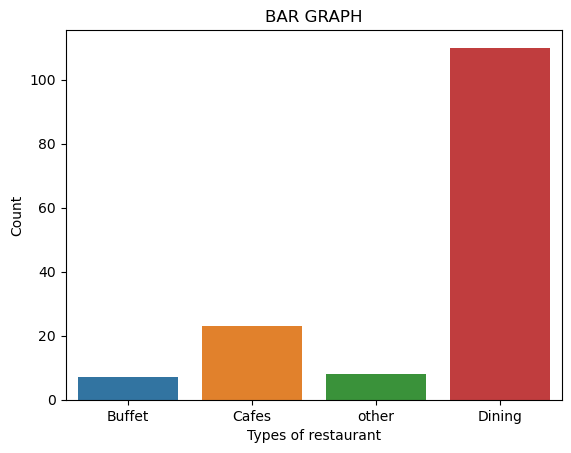

In [45]:
sns.countplot(x=data['listed_in(type)'])
mpl.xlabel("Types of restaurant")
mpl.ylabel("Count")
mpl.title("BAR GRAPH")

conclusion - majority of the restaurant falls in dining type

Q2 - Votes by customers

Text(0.5, 1.0, 'LINE GRAPH')

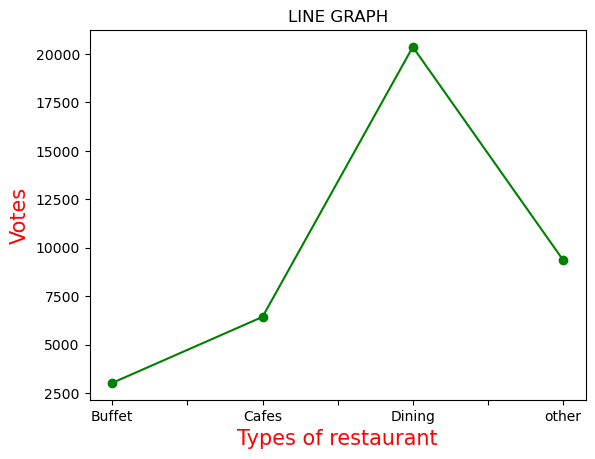

In [49]:
group = data.groupby('listed_in(type)')['votes'].sum()
group.plot(kind='line',  c='green', marker = 'o')
mpl.xlabel('Types of restaurant', c='red', size = 15)
mpl.ylabel('Votes', c='red', size = 15)
mpl.title('LINE GRAPH')



conclusion - dining restaurants has recieved maximum votes

Q3 - Rating of majority restaurants

Text(0.5, 1.0, 'BAR GRAPH')

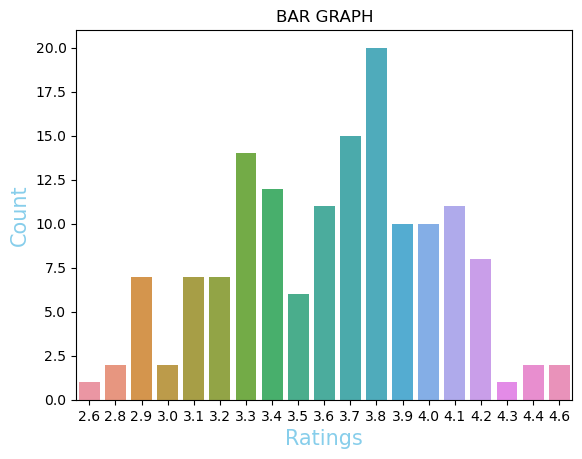

In [51]:
sns.countplot(x=data['rate'])
mpl.xlabel('Ratings', c='skyblue', size = 15)
mpl.ylabel('Count', c='skyblue', size = 15)
mpl.title('BAR GRAPH')


conclusion - The majority restaurant recieved ratings 3.8

Q4 - Average spending of couples

Text(0.5, 1.0, 'BAR GRAPH')

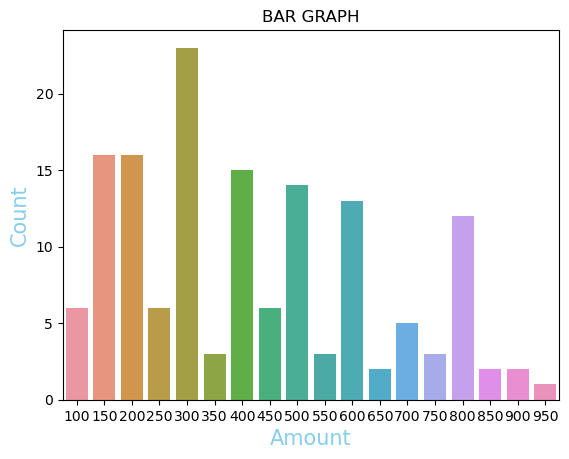

In [59]:
sns.countplot(x = data['approx_cost(for two people)'])
mpl.xlabel('Amount', c='skyblue', size = 15)
mpl.ylabel('Count', c='skyblue', size = 15)
mpl.title('BAR GRAPH')

conclusion - The majority of couples prefer restaurants with an approx cost of 300 rupees

Q5 - Max rating(online or offline)

Text(0.5, 1.0, 'BOX PLOT')

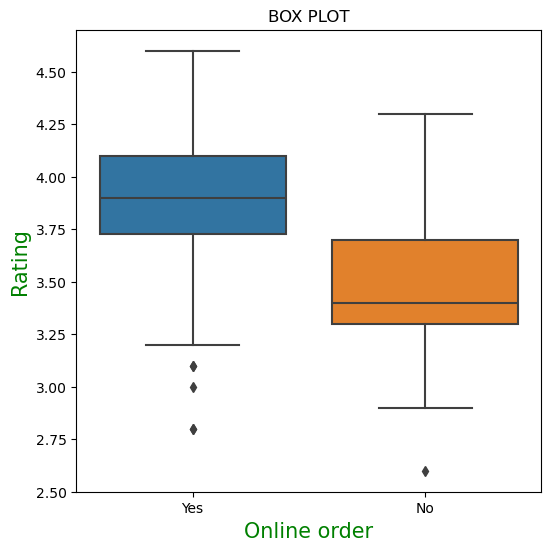

In [73]:
mpl.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y = 'rate' , data= data)
mpl.xlabel('Online order', c='green', size = 15)
mpl.ylabel('Rating', c='green', size = 15)
mpl.title('BOX PLOT')

conclusion - offline order received lower rating in comparison to online order 

Q6 - Restaurant recieve order (online or offline)

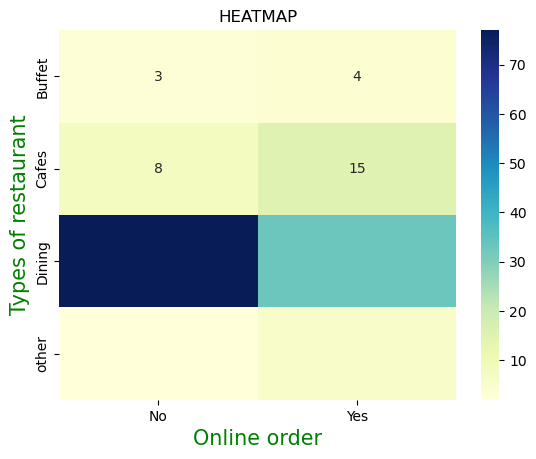

In [85]:
pivot_table = data.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc='size')
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu')
mpl.title('HEATMAP')
mpl.xlabel('Online order', c='green',size = 15)
mpl.ylabel('Types of restaurant', c='green', size = 15)
mpl.show()

conclusion - dining restaurant primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefers to place orders in person at restaurants, but prefer online ordering at cafes.